In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("../Data/Cleaned_Births.csv")

# Specify the states for which you want to create graphs
states = ['Alabama', 'Delaware']  # Replace with the actual states you want

# Iterate over the states and create separate graphs for each state
for state in states:
    # Filter the data for the current state
    state_data = data[data['State'] == state]

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize = (15, 10))

    # Group the data by year and education level code, and calculate the sum of number of births
    grouped_data = state_data.groupby(['Year', 'Education Level of Mother'])['Number of Births'].sum().unstack()

    # Plot the data as multiple bars
    grouped_data.plot(kind='bar', ax=ax)

    # Set the labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Births')
    ax.set_title(f'Number of Births by Education Level ({state})')

    # Add a legend
    legend = ax.legend(title='Education Level of Mother', fontsize = 'small', bbox_to_anchor=(1, 1))
    legend.get_title().set_fontsize('small')

    for container in ax.containers:
        ax.bar_label(container)

    # Display the graph
    plt.tight_layout()
    plt.show()


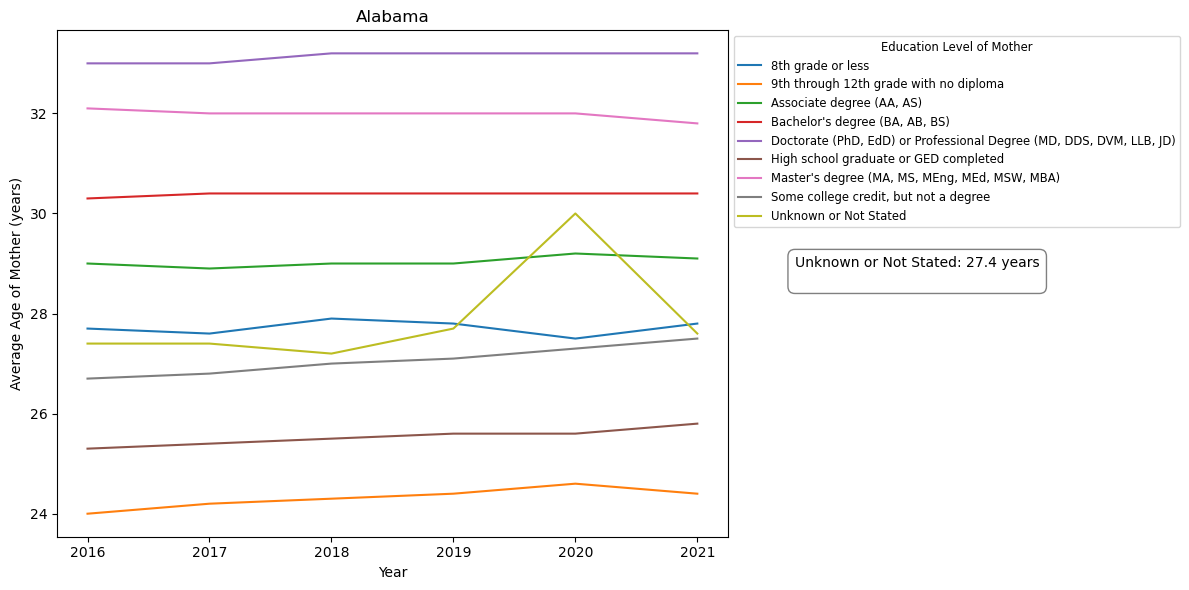

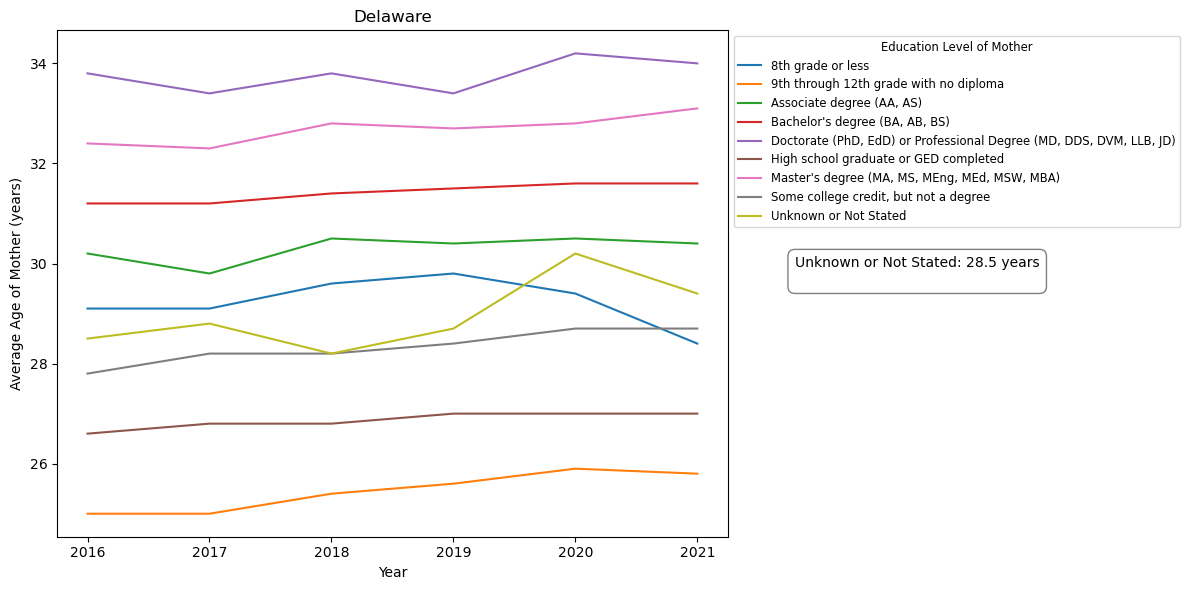

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('../Data/Avg_Mothers_Birth.csv')

# Get the unique states from the data
states = ['Alabama', 'Delaware']

# Iterate through each state
for state in states:
    # Filter the data for the current state
    state_data = data[data['State'] == state]

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Iterate through each education level
    education_levels = state_data['Education Level of Mother'].unique()
    for level in education_levels:
        # Filter the data for the current education level
        level_data = state_data[state_data['Education Level of Mother'] == level]

        # Plot the data for the current education level
        ax.plot(level_data['Year'], level_data['Average Age of Mother (years)'], label=level)

       
    # Set the labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Age of Mother (years)')
    ax.set_title(state)

    # Add a legend
    legend = ax.legend(title='Education Level of Mother', fontsize='small', bbox_to_anchor=(1, 1))
    legend.get_title().set_fontsize('small')

     # Create the text box
    info_text = ''
    for level in education_levels:
        level_data_filtered = level_data[level_data['Education Level of Mother'] == level]
        if not level_data_filtered.empty:
            avg_age = level_data_filtered['Average Age of Mother (years)'].values[0]
            info_text += f'{level}: {avg_age:.1f} years\n'

    text_box = ax.text(1.1, 0.5, info_text, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

    # Display the graph
    plt.tight_layout()
    plt.show()



In [ ]:
class US_Births:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        
    def read_csv(self):
        self.data = pd.read_csv(self.file_path)
        print("CSV file successfully loaded.")

    def remove_columns(self, columns):
        self.data.drop(columns=columns, inplace=True)
        print("Columns successfully removed.")
        
    def get_data(self):
        return self.data

    def state_keyword_query(self, keyword):
        matching_states = [state for state in self.data['State'].unique() if keyword in state]
        print(f"Matching State for keyword '{keyword}':")
        for State in matching_states:
            print(State)

    def sort_data(self):
        sorted_data = self.data.sort_values(by=['State', 'Education Level of Mother'])
        combined_data = sorted_data.groupby(['State', 'Year', 'Education Level of Mother']).agg({
            'Number of Births': 'sum',
            'Average Age of Mother (years)': lambda x: round(x.mean(), 1)
        }).reset_index()
        return combined_data

if __name__ == "__main__":
    file_path = '../Data/us_births_2016_2021.csv'       
    data_processor = US_Births(file_path)
    data_processor.read_csv()

    # remove columns
    columns_to_remove = ['State Abbreviation', 'Average Birth Weight (g)', 'Gender']  
    data_processor.remove_columns(columns_to_remove)
    
    #creates clean DF
    cleaned_data = data_processor.get_data()
    cleaned_data.to_csv('../Data/Cleaned_Births.csv', index=False)
    print("Cleaned data saved as 'Cleaned_Births.csv'.")

    keyword = 'keyword'  # Replace 'keyword' with your desired keyword
    data_processor.state_keyword_query(keyword)

    combined_data = data_processor.sort_data()
    combined_data.to_csv('../Data/Avg_Mothers_Birth.csv', index=False)
    print("Cleaned data saved as 'Avg_Mothers_Birth.csv'.")

In [ ]:
combined_data